# Análisis Exploratorio de los Datos de Fuentes No Identificadas (UnIDs)

In [18]:
import pandas as pd
import os

# Ruta raíz del proyecto
project_root = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
file_path = os.path.join(project_root, 'data', 'raw', 'unids_3F_beta_err_names.txt')

# Leer archivo
unids_df = pd.read_csv(file_path, sep='\s+', header=0)

In [19]:
# Ver muestra
unids_df.head()

,E_peak,beta,sigma_det,beta_Rel,number
0,2.51290,0.0897,7.3996,1.630992,0
1,1.47820,0.4163,5.4150,0.770838,1
2,1.59640,0.6783,10.7909,0.371222,2
3,0.93095,0.2771,7.6056,0.628654,3
4,0.44480,0.3207,4.2748,0.567509,4


## Descripción y estadísticas

In [20]:
unids_df.describe()

,E_peak,beta,sigma_det,beta_Rel,number
count,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000
mean,6.035556,0.347647,8.310279,0.936490,562.000000
std,89.583292,0.236009,5.601328,2.808888,324.903832
min,0.000002,0.002400,4.055600,0.000900,0.000000
25%,0.376570,0.159000,5.117300,0.362970,281.000000
50%,0.811710,0.305800,6.509900,0.547970,562.000000
75%,1.702900,0.493200,9.208800,0.889688,843.000000
max,2950.500000,1.000000,50.308300,74.954225,1124.000000


In [21]:
unids_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1125 entries, 0 to 1124
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   E_peak     1125 non-null   float64
 1   beta       1125 non-null   float64
 2   sigma_det  1125 non-null   float64
 3   beta_Rel   1125 non-null   float64
 4   number     1125 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 44.1 KB


## 📊 Histogramas de cada feature

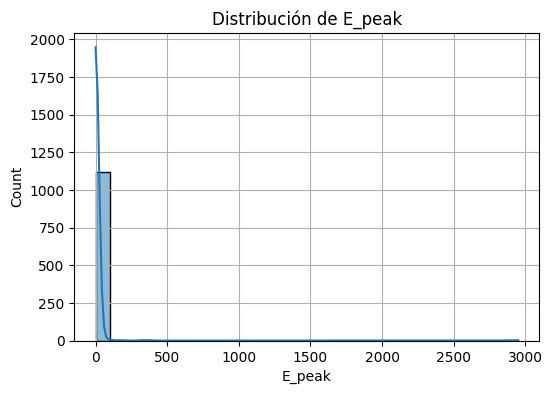

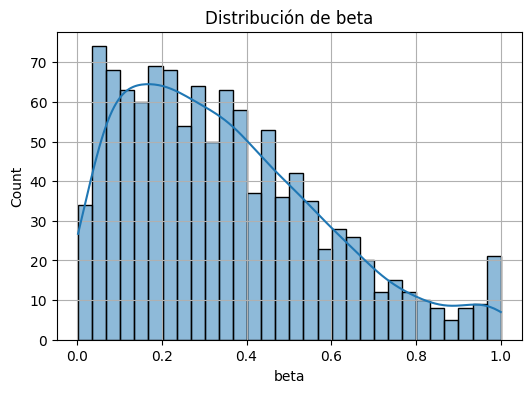

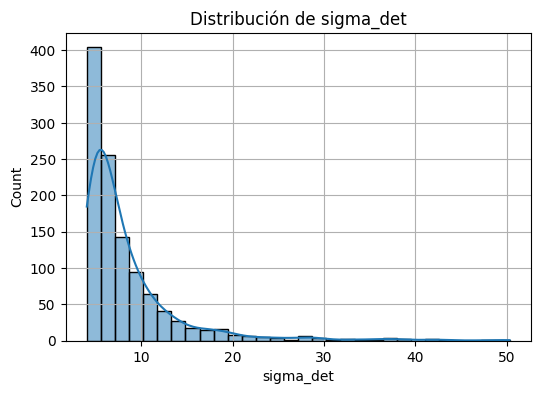

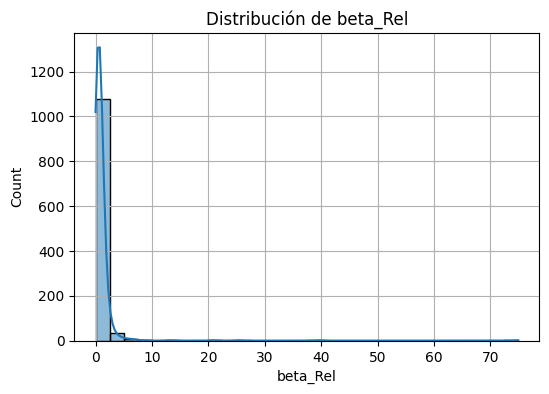

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

features = ['E_peak', 'beta', 'sigma_det', 'beta_Rel']

for col in features:
    plt.figure(figsize=(6, 4))
    sns.histplot(unids_df[col], kde=True, bins=30)
    plt.title(f'Distribución de {col}')
    plt.grid(True)
    plt.show()

## 📊 Correlaciones

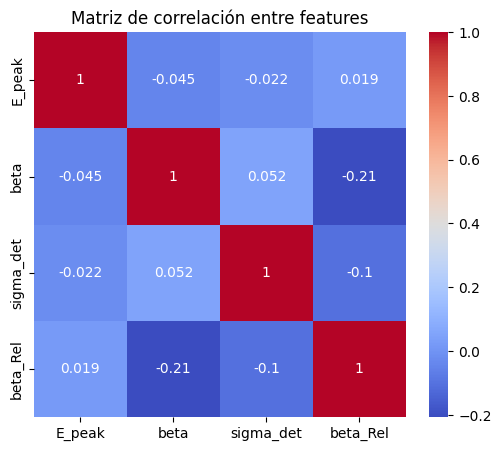

In [23]:
plt.figure(figsize=(6, 5))
sns.heatmap(unids_df[features].corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de correlación entre features')
plt.show()

## PCA (proyección 2D)

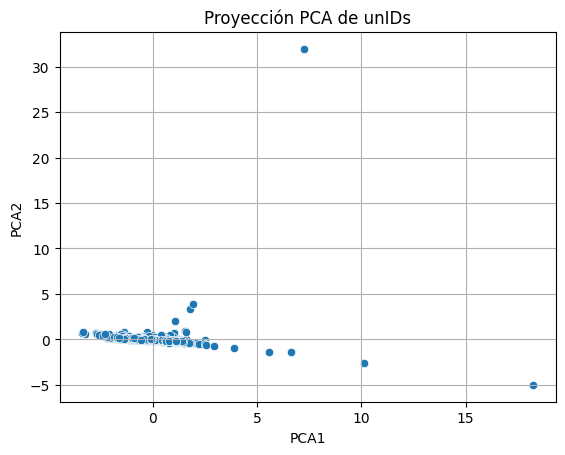

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
scaled_data = scaler.fit_transform(unids_df[features])

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

unids_df['PCA1'] = pca_result[:, 0]
unids_df['PCA2'] = pca_result[:, 1]

sns.scatterplot(x='PCA1', y='PCA2', data=unids_df)
plt.title('Proyección PCA de unIDs')
plt.grid(True)
plt.show()